<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/graviationalwave_GW150914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graviational Wave GW150914 (Sep 2015)**

The signal was named [GW150914](https://en.m.wikipedia.org/wiki/First_observation_of_gravitational_waves) (from gravitational wave and the date of observation 2015-09-14). It was also the first observation of a binary black hole merger. Research paper:  https://arxiv.org/abs/1602.03839

In [ ]:
# gwpy and h5py for LIGOs HDF5 data
!pip install h5py gwpy ja gwosc PyWavelets matplotlib -q
import numpy as np
from gwpy.timeseries import TimeSeries
from gwosc import datasets # gwosc provides access to all detected events
from gwpy.plot import Plot
import matplotlib.pyplot as plt
import h5py

**Load and select data**

In [ ]:
# List all available events of gravitational waves
events = datasets.find_datasets(type="event")
print(f"Available events: {events}")

Available events: ['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191118_212859-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200121_031748-v1', '200201_203549-v1', '200214_224526-v1', '200214_224526-v2', '200219_201407-v1', '200311_103121-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190412_053044-v4', 'GW190413_052954-v1', 'GW190413_052954-v2', 'GW190413_134308-v1', 'GW190413_134308-

For example see [Marginal candidates from "GWTC-1](https://gwosc.org/eventapi/html/GWTC-1-marginal/)

In [ ]:
# Select one gravitational event
#event = 'GW170608' #; time = 1180922494.5
#event = 'GW170814' #; time = 1186741861.5
event = 'GW150914' #; time = 1126259462

In [ ]:
# Get GPS time for a specific event (from gwosc import datasets)
time = datasets.event_gps(event)
print(f"GPS Time for {event}: {time}")

GPS Time for GW150914: 1126259462.4


In [ ]:
# Alternative data loading methods

# Load data manually from github or science website
# !wget https://raw.githubusercontent.com/deltorobarba/astrophysics/master/hanford_GW170814.hdf5
# !wget https://www.gw-openscience.org/s/events/GW150914/H-H1_LOSC_4_V2-1126259446-32.hdf5

# Load data from gwpy.timeseries
# h1_data = TimeSeries.fetch_open_data('H1', time - 16, time + 16, cache=True)
# l1_data = TimeSeries.fetch_open_data('L1', time - 16, time + 16, cache=True)

**Inspect data**

In [ ]:
# Fetch LIGO data for gravitational wave event from gwosc import datasets
def load_ligo_data(event=event, detector='H1', duration=32):
    # Start time of the event (GPS timestamp)
    event_time = time  # event time in GPS seconds

    # Fetch the strain data around event
    start_time = event_time - duration // 2
    end_time = event_time + duration // 2

    # Fetch strain data for a specific detector (H1 or L1)
    data = TimeSeries.fetch_open_data(detector, start_time, end_time, cache=True)
    return data

# Load strain data for Hanford (H1) and Livingston (L1) detectors
h1_data = load_ligo_data(event=event, detector='H1')
l1_data = load_ligo_data(event=event, detector='L1')

print("Hanford Data (H1):", h1_data)
print("Livingston Data (L1):", l1_data)

Hanford Data (H1): TimeSeries([ 4.11628029e-19,  3.96443979e-19,  3.38344656e-19,
            ..., -6.44526154e-21, -6.36026905e-21,
            -3.74912730e-20]
           unit: dimensionless,
           t0: 1126259446.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Livingston Data (L1): TimeSeries([-9.57782180e-19, -9.44008859e-19, -9.68975657e-19,
            ..., -7.18181209e-19, -7.29759972e-19,
            -7.35275811e-19]
           unit: dimensionless,
           t0: 1126259446.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [ ]:
h1_data

<TimeSeries([ 4.11628029e-19,  3.96443979e-19,  3.38344656e-19,
             ..., -6.44526154e-21, -6.36026905e-21,
             -3.74912730e-20]
            unit=Unit(dimensionless),
            t0=<Quantity 1.12625945e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [ ]:
l1_data

<TimeSeries([-9.57782180e-19, -9.44008859e-19, -9.68975657e-19,
             ..., -7.18181209e-19, -7.29759972e-19,
             -7.35275811e-19]
            unit=Unit(dimensionless),
            t0=<Quantity 1.12625945e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [ ]:
print(f"Number of Records: {h1_data.size} for Hanford Data (H1)")
print(f"Number of Records: {l1_data.size} for Livingston Data (L1)")

Number of Records: 131072 for Hanford Data (H1)
Number of Records: 131072 for Livingston Data (L1)


In [ ]:
print("Hanford Data Summary:")
print(f"Start Time: {h1_data.times.value[0]} GPS seconds")
print(f"End Time: {h1_data.times.value[-1]} GPS seconds")
print(f"Sampling Rate: {h1_data.sample_rate} Hz")
print(f"Duration: {h1_data.duration.value} seconds")
print(f"Number of Records: {len(h1_data)}")

print("\nLivingston Data Summary:")
print(f"Start Time: {l1_data.times.value[0]} GPS seconds")
print(f"End Time: {l1_data.times.value[-1]} GPS seconds")
print(f"Sampling Rate: {l1_data.sample_rate} Hz")
print(f"Duration: {l1_data.duration.value} seconds")
print(f"Number of Records: {len(l1_data)}")

Hanford Data Summary:
Start Time: 1126259446.3999023 GPS seconds
End Time: 1126259478.3996582 GPS seconds
Sampling Rate: 4096.0 Hz Hz
Duration: 32.0 seconds
Number of Records: 131072

Livingston Data Summary:
Start Time: 1126259446.3999023 GPS seconds
End Time: 1126259478.3996582 GPS seconds
Sampling Rate: 4096.0 Hz Hz
Duration: 32.0 seconds
Number of Records: 131072


In [ ]:
# h1_data.write("l1_data.hdf5", format="hdf5")
# print("Data saved as H1_GW170814.hdf5")

Data saved as H1_GW170814.hdf5


**Visualize and preprocess data**

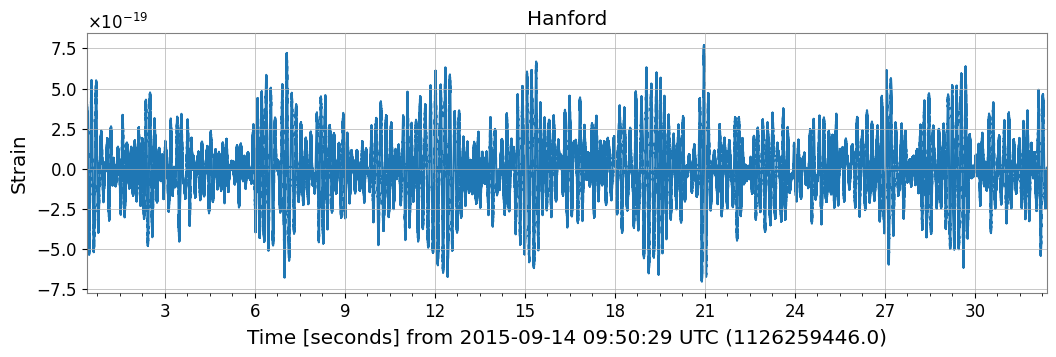

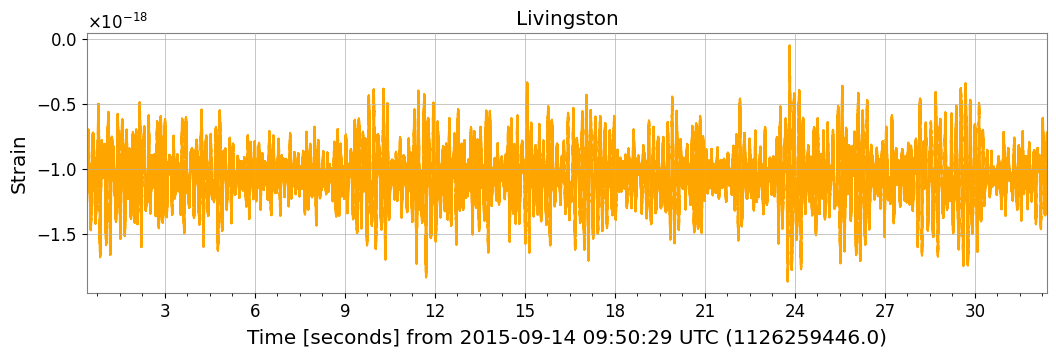

In [ ]:
# Plot raw strain data for Hanford (H1) and Livingston (L1)
plot_h1a = h1_data.plot(title='Hanford')
plt.ylabel("Strain")
plt.show()

plot_l1a = l1_data.plot(title='Livingston', color='orange')
plt.ylabel("Strain")
plt.show()

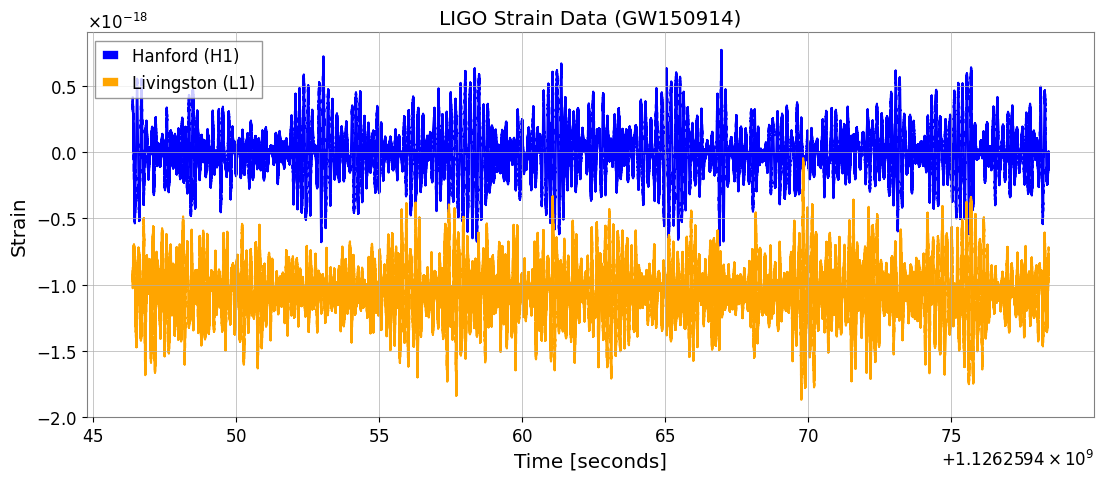

In [ ]:
# Produce overlay visualisation
# Simple: plot = Plot(h1_data, l1_data, title=f"LIGO Strain Data ({event})")
plt.figure(figsize=(13, 5))
plt.plot(h1_data, label="Hanford (H1)", color="blue")
plt.plot(l1_data, label="Livingston (L1)", color="orange")
plt.title(f"LIGO Strain Data ({event})")
plt.legend()
plt.xlabel("Time [seconds]")
plt.ylabel("Strain")
plt.show()

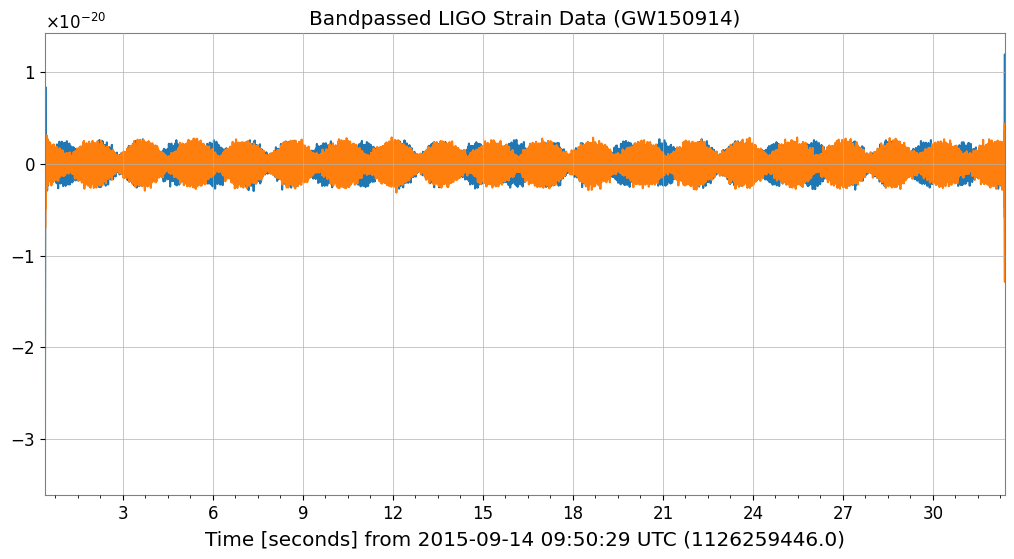

In [ ]:
# Apply a bandpass filter between 30 Hz and 300 Hz (Gravitational wave signals)
h1_data_bp = h1_data.bandpass(30, 400)
l1_data_bp = l1_data.bandpass(30, 400)
plot = Plot(h1_data_bp, l1_data_bp, title=f"Bandpassed LIGO Strain Data ({event})")
plot.show()

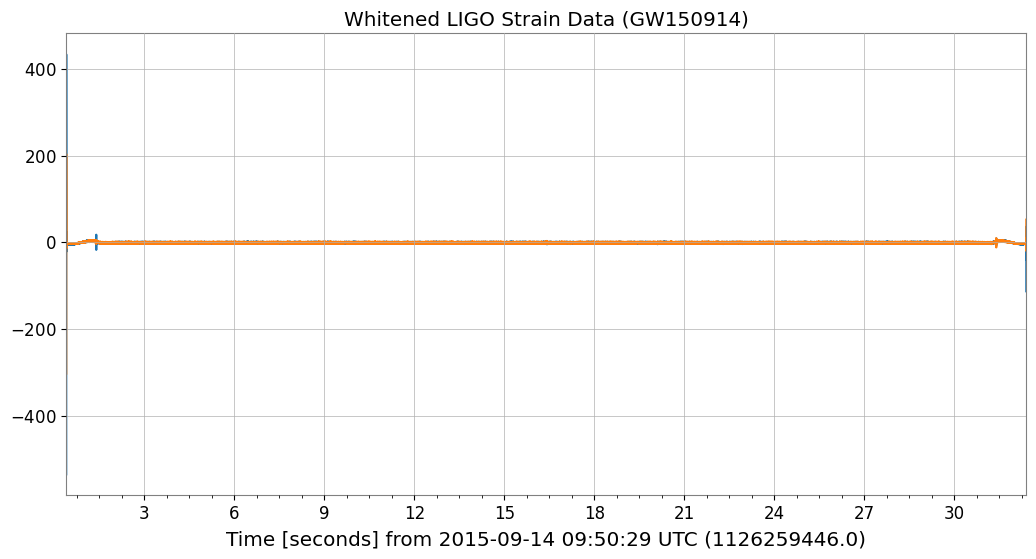

In [ ]:
# Apply whitening to strain data. Makes noise spectrum flat across frequencies. Enhances gravitational wave signal
# (Lower frequencies may be dominated by seismic noise, higher frequencies can be influenced by quantum shot noise)
# Whitening divides signal by amplitude spectral density of noise. Results in spectrum where each frequency component has approx. same noise level
h1_data_white = h1_data_bp.whiten()
l1_data_white = l1_data_bp.whiten()
plot = Plot(h1_data_white, l1_data_white, title=f"Whitened LIGO Strain Data ({event})")

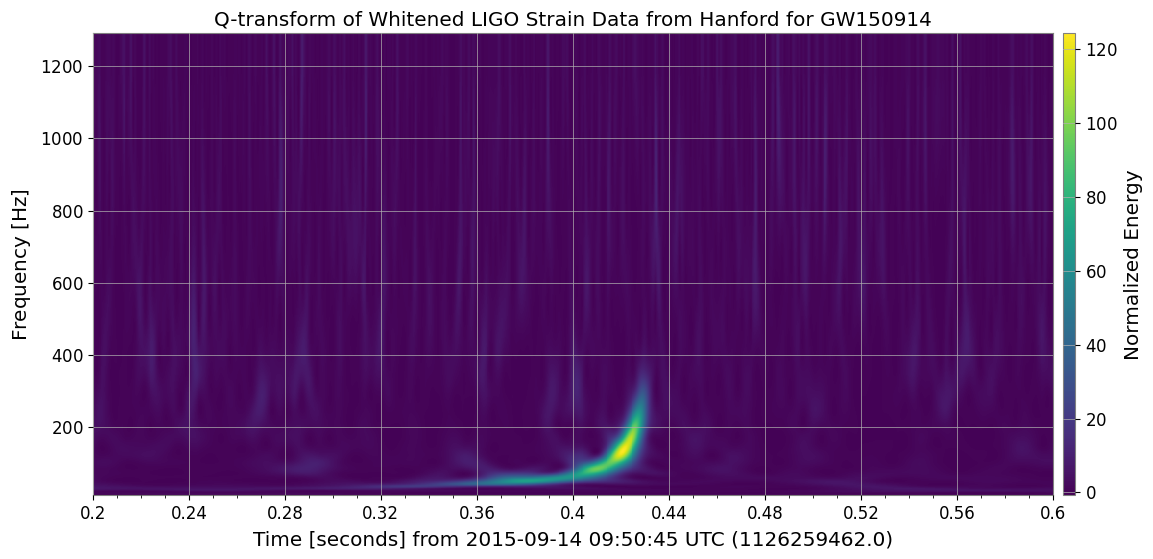

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_h1 = h1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_h1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform of Whitened LIGO Strain Data from Hanford for {event}")
plt.show()

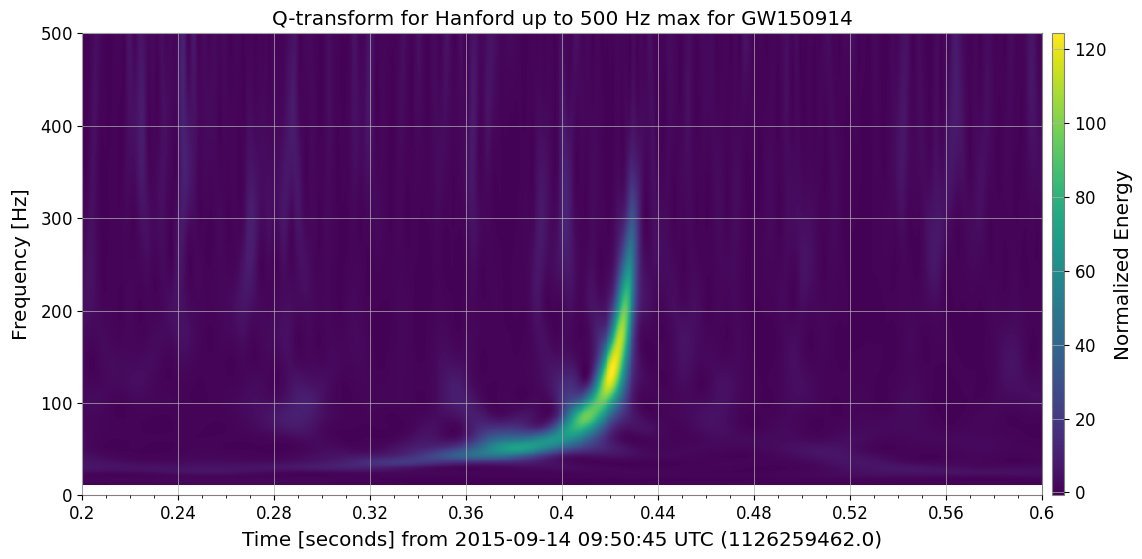

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_h1 = h1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_h1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform for Hanford up to 500 Hz max for {event}")
plt.ylim(0, 500)
plt.show()

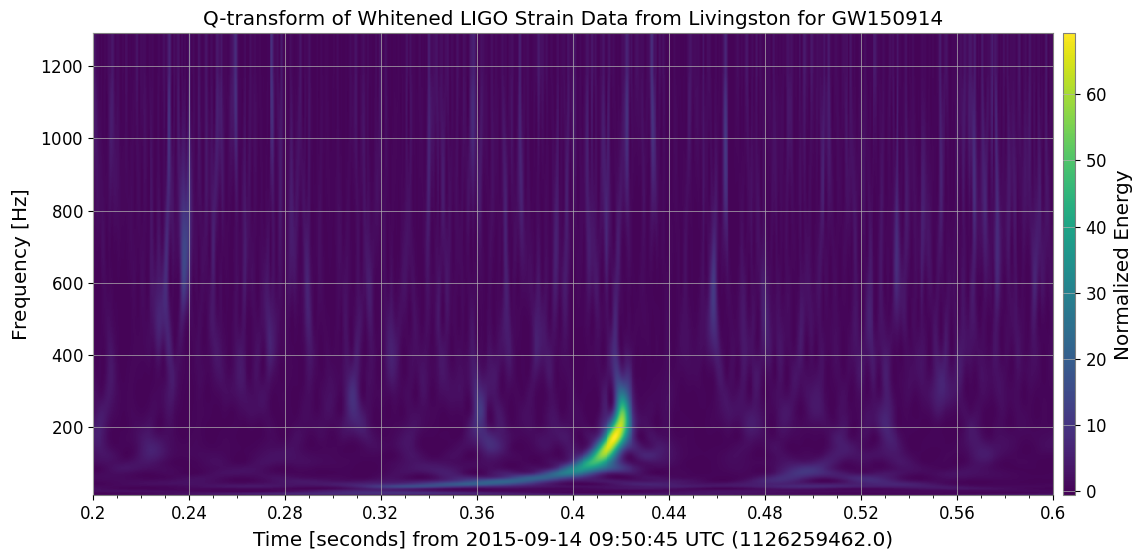

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_l1 = l1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_l1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform of Whitened LIGO Strain Data from Livingston for {event}")
plt.show()

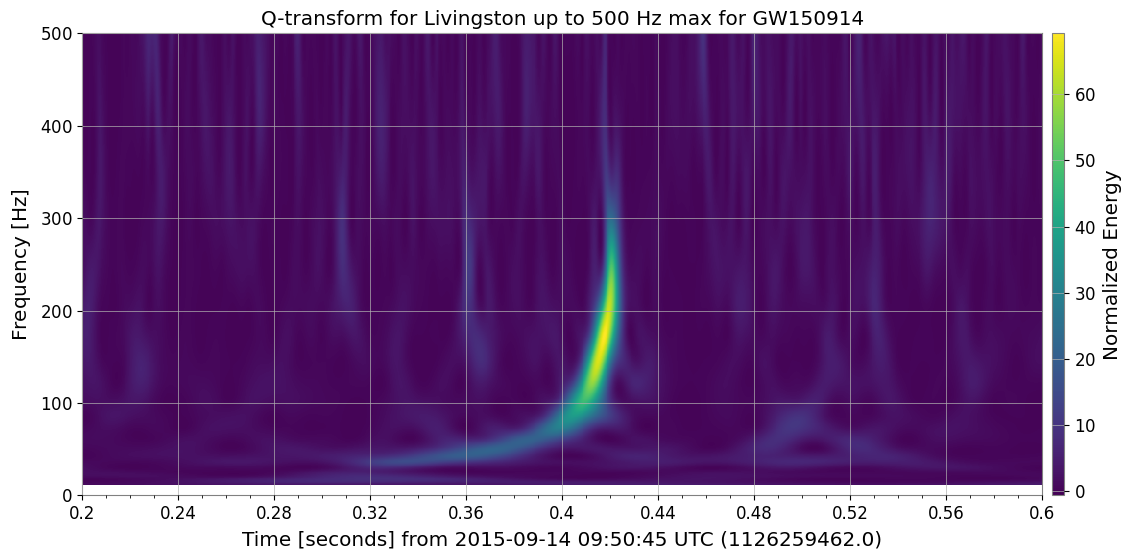

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_l1 = l1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_l1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform for Livingston up to 500 Hz max for {event}")
plt.ylim(0, 500)
plt.show()

**Add-on: Manually load and Explore multiple events of Gravitational-Wave Open Science Center (GWOSC)** (check code for correctness)

In [ ]:
!pip install gwosc h5py gwpy PyWavelets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00


In [ ]:

# Download strain data for H1 (Hanford) or L1 (Livingston) detector,
# Download manually file H-H1_LOSC_4_V2-1126259446-32.hdf5 (contains raw strain data around the event)
!wget https://www.gw-openscience.org/s/events/GW150914/H-H1_LOSC_4_V2-1126259446-32.hdf5

import h5py

# Path to downloaded HDF5 file
file_path = 'H-H1_LOSC_4_V2-1126259446-32.hdf5'  # Replace file path

# Open HDF5 file and explore its structure
with h5py.File(file_path, 'r') as f:
    # List all groups and datasets in the file
    print("Keys in the file:", list(f.keys()))

    # Explore 'strain' group if it exists
    if 'strain' in f.keys():
        strain_group = f['strain']
        print("\nDatasets in 'strain' group:", list(strain_group.keys()))

        # List all attributes in 'strain' group
        print("\nAttributes in 'strain' group:", list(strain_group.attrs.keys()))

        # Does 'SampleRate' exist?
        if 'SampleRate' in strain_group.attrs:
            print("SampleRate:", strain_group.attrs['SampleRate'])
        else:
            print("SampleRate attribute not found.")

import h5py
import numpy as np

# Open HDF5 file
with h5py.File(file_path, 'r') as f:
    # Does 'strain' group exists?
    if 'strain' in f.keys():
        strain_data = f['strain']['Strain'][:]  # Extract strain data
        print("Strain data shape:", strain_data.shape)

        # Access 'SampleRate' (otherwise handle missing attribute)
        if 'SampleRate' in f['strain'].attrs:
            sample_rate = f['strain'].attrs['SampleRate']
            print("Sample Rate:", sample_rate, "Hz")
        else:
            print("SampleRate attribute not found.")

        # Extract other attributes (like duration) if available
        if 'Duration' in f['strain'].attrs:
            duration = f['strain'].attrs['Duration']
            print("Duration:", duration, "seconds")
        else:
            print("Duration attribute not found.")

--2024-11-10 06:32:18--  https://www.gw-openscience.org/s/events/GW150914/H-H1_LOSC_4_V2-1126259446-32.hdf5
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.72
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.72|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/events/GW150914/H-H1_LOSC_4_V2-1126259446-32.hdf5 [following]
--2024-11-10 06:32:19--  https://gwosc.org/s/events/GW150914/H-H1_LOSC_4_V2-1126259446-32.hdf5
Resolving gwosc.org (gwosc.org)... 131.215.113.72
Connecting to gwosc.org (gwosc.org)|131.215.113.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1040592 (1016K)
Saving to: ‘H-H1_LOSC_4_V2-1126259446-32.hdf5’

H-H1_LOSC_4_V2-1126 100%[===================>]   1016K  2.07MB/s    in 0.5s    

2024-11-10 06:32:20 (2.07 MB/s) - ‘H-H1_LOSC_4_V2-1126259446-32.hdf5’ saved [1040592/1040592]

Keys in the file: ['meta', 'quality', 'strain']

Datasets in 'strain

In [ ]:
# If metadata like SampleRate or Duration is missing from file, manually set typical values based on LIGO standards:
# Sample Rate: Typically, LIGO data has a sample rate of 4096 Hz or 16384 Hz.
# Duration: can be inferred from data array length and sample rate.

# Set default sample rate if not found
sample_rate = 4096  # sample rate not found, manually set to 4096 Hz
duration = len(strain_data) / sample_rate
print(f"Inferred Duration: {duration} seconds based on sample rate {sample_rate} Hz")

Inferred Duration: 32.0 seconds based on sample rate 4096 Hz


In [ ]:
import numpy as np
from gwpy.timeseries import TimeSeries

# Download LIGO open data for a specific event (GW150914)
def load_ligo_event_data(event='GW150914'):
    start_time = 1126259462  # GW150914 start time
    end_time = start_time + 32  # 32 seconds of data

    # Download strain data for  Hanford and Livingston detectors
    h_data = TimeSeries.fetch_open_data('H1', start_time, end_time, cache=True)
    l_data = TimeSeries.fetch_open_data('L1', start_time, end_time, cache=True)

    return h_data, l_data

# Load data for both detectors
hanford_data, livingston_data = load_ligo_event_data()

# Resample data to a lower sample rate for easier computation
sample_rate = 4096  # LIGO's default is 16384, but downsample to 4096 for performance
hanford_data = hanford_data.resample(sample_rate)
livingston_data = livingston_data.resample(sample_rate)

# Extract raw data arrays
h_strain = hanford_data.value
l_strain = livingston_data.value

/usr/local/lib/python3.10/dist-packages/gwpy/timeseries/timeseries.py:930: UserWarning: resample() rate matches current sample_rate (4096.0 Hz), returning input data unmodified; please double-check your parameters
  warnings.warn(


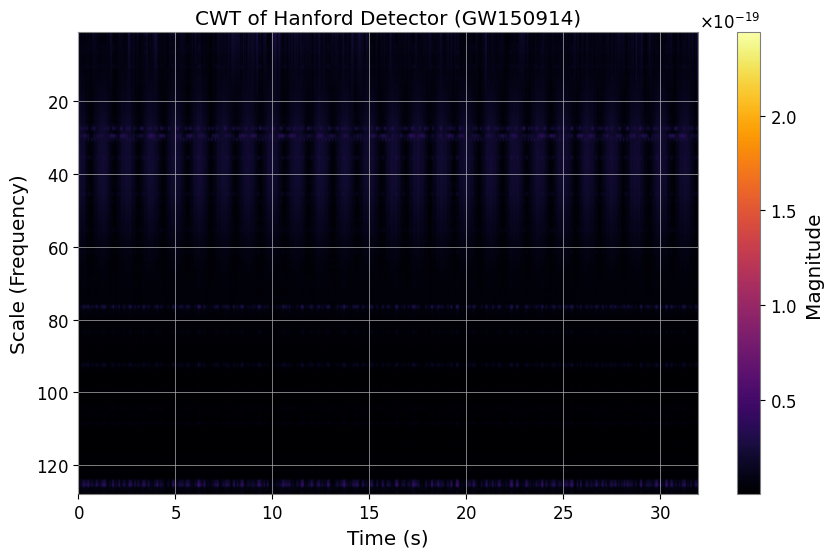

In [ ]:
import pywt
import matplotlib.pyplot as plt

# Perform Continuous Wavelet Transform (CWT) on strain data
def cwt_transform(strain_data, wavelet='morl', scales=np.arange(1, 128)):
    coeffs, freqs = pywt.cwt(strain_data, scales, wavelet, 1 / sample_rate)
    return coeffs

# Apply CWT to Hanford data
cwt_hanford = cwt_transform(h_strain)

# Visualize time-frequency representation
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(cwt_hanford), aspect='auto', cmap='inferno', extent=[0, len(h_strain)/sample_rate, 1, 128])
plt.gca().invert_yaxis()
plt.colorbar(label='Magnitude')
plt.title('CWT of Hanford Detector (GW150914)')
plt.xlabel('Time (s)')
plt.ylabel('Scale (Frequency)')
plt.show()